<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# web location:
local_csv = 'data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [4]:
# A:
nhl = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [10]:
# A:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    90 non-null     object 
 1   PTS     90 non-null     int64  
 2   Rank    90 non-null     int64  
 3   TOI     90 non-null     object 
 4   GF      90 non-null     int64  
 5   GA      90 non-null     int64  
 6   GF60    90 non-null     float64
 7   GA60    90 non-null     float64
 8   GF%     90 non-null     float64
 9   SF      90 non-null     int64  
 10  SA      90 non-null     int64  
 11  SF60    90 non-null     float64
 12  SA60    90 non-null     float64
 13  SF%     90 non-null     float64
 14  FF      90 non-null     int64  
 15  FA      90 non-null     int64  
 16  FF60    90 non-null     float64
 17  FA60    90 non-null     float64
 18  FF%     90 non-null     float64
 19  CF      90 non-null     int64  
 20  CA      90 non-null     int64  
 21  CF60    90 non-null     float64
 22  CA60

In [15]:
y = nhl['Rank']

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [16]:
# A:
np.unique(y)

array([1, 2, 3])

### 4. What is the baseline accuracy?

In [17]:
# A:
nhl['Rank'].value_counts(normalize = True)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

In [18]:
#34.4%

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [19]:
# A:
X = nhl.iloc[:, [1, 8, 18, 25]]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# A:
knn_1 = KNeighborsClassifier(n_neighbors=1).fit(X, y)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [22]:
# A:
knn_1.score(X, y)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, random_state=42)

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [25]:
# A:
knn_n_rows = KNeighborsClassifier(n_neighbors=len(y_train)).fit(X_train, y_train)
knn_n_rows.score(X_test, y_test)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.3111111111111111

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [27]:
import warnings

In [28]:
warnings.filterwarnings('ignore')

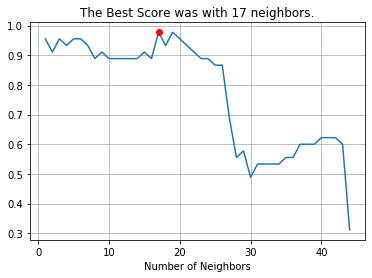

In [32]:
# A:
scores = []
for i in range(1, len(y_train)):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(range(1, len(y_train)), scores)
plt.xlabel('Number of Neighbors')
plt.plot(np.argmax(scores) + 1, max(scores), 'ro')
plt.title(f'The Best Score was with {np.argmax(scores) + 1} neighbors.')
plt.grid()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: